# Stock Prices Data Collection

### References

**EOD Historical Data API**
   - Tutorial: [Getting Started with EOD Historical Data API](https://eodhd.com/financial-apis/quick-start-with-our-financial-data-apis/?_gl=1*r5qfr2*_up*MQ..*_ga*MTM3MDI2OTk4MS4xNzEyNTMzMDAw*_ga_NRYML8NKGH*MTcxMjUzMjk5OS4xLjEuMTcxMjUzMzAxNy4wLjAuMTc3OTI0OTU2OA..) (Accessed on April 3, 2024)
     - Reference: EOD Historical Data. "Getting Started with EOD Historical Data API." Latest version. EOD Historical Data.

**yfinance Library**
   - Tutorial: [How to Get Stock Data using Python](https://www.learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/) (Accessed on April 3, 2024)
     - Reference: Learn Data Science. "How to Get Stock Data using Python." *Learn Data Sci*. Latest version. Learn Data Sci.



The provided code snippet retrieves stock price data from the EOD Historical Data API for a list of predefined tickers. It then writes this data to CSV files, both for individual tickers and for all tickers combined. The script iterates over each ticker, sends a request to the API for the specified date range, retrieves the data, and writes it to CSV files. If an error occurs during the API request, it prints an error message along with the status code and response text.

In [10]:
# import requests  
# import csv  

# api_token = "655add3de97bb4.41000237"  # API token for accessing the data
# tickers = ["AAPL", "GOOGL", "MSFT", "AMZN", "TSLA", "SPY", "QQQ", "JPM", "BAC", "GS", "C"]  # List of ticker symbols to fetch data for
# url = f"https://eodhd.com/api/eod"  # Base URL for the API
# csv_file_name_all = "stock_prices_eodhd_alltickers.csv"  # Name of the CSV file to store all data

# # Opening the CSV file to write all data
# with open(f"./data/stock_prices/eodhd/{csv_file_name_all}", mode="w", newline="", encoding="utf-8") as csv_file_all:
#     csv_writer_all = csv.writer(csv_file_all)  # Creating a CSV writer object
#     csv_writer_all.writerow(["Ticker", "Date", "Open", "High", "Low", "Close", "Adjusted_close", "Volume"])  # Writing header row to the CSV file

#     # Iterating over each ticker symbol
#     for ticker in tickers:
#         csv_file_name_ticker = f"stock_prices_eodhd_{ticker}.csv"  # Generating filename for each ticker

#         # Opening CSV file for individual ticker data
#         with open(f"./data/stock_prices/eodhd/{csv_file_name_ticker}", mode="w", newline="", encoding="utf-8") as csv_file_ticker:
#             csv_writer_ticker = csv.writer(csv_file_ticker)  # Creating a CSV writer object
#             csv_writer_ticker.writerow(["Date", "Open", "High", "Low", "Close", "Adjusted_close", "Volume"])  # Writing header row to the CSV file

#             # Parameters for the API request
#             params = {
#                 "api_token": api_token,
#                 "fmt": "json",
#                 "period": "d",
#                 "from": "2022-01-01",
#                 "to": "2022-12-30"
#             }

#             # Sending GET request to fetch data for the current ticker
#             response = requests.get(f"{url}/{ticker}.US", params=params)

#             # Checking if the request was successful (status code 200)
#             if response.status_code == 200:
#                 data = response.json()  # Parsing JSON response

#                 # Iterating over each day's data and writing it to the CSV file
#                 for day_data in data:
#                     date = day_data.get("date")
#                     open_price = day_data.get("open")
#                     high_price = day_data.get("high")
#                     low_price = day_data.get("low")
#                     close_price = day_data.get("close")
#                     adjusted_close = day_data.get("adjusted_close")
#                     volume = day_data.get("volume")

#                     # Writing data to the CSV file for the individual ticker
#                     csv_writer_ticker.writerow([date, open_price, high_price, low_price, close_price, adjusted_close, volume])

#                     # Writing data to the CSV file for all tickers
#                     csv_writer_all.writerow([ticker, date, open_price, high_price, low_price, close_price, adjusted_close, volume])
#             else:
#                 # Error handling for failed API requests
#                 print(f"Error for {ticker}: {response.status_code} - {response.text}")
#                 break  # Exiting loop if there's an error (optional)


![alt text](./img/stock_prices.png "Title")

As Data from EODHD API turned out to have some major errors, we decided to go with a different API - Yahoo Finance.

In [11]:
import yfinance as yf  # Importing yfinance library for fetching stock data
import os  # Importing os module for file operations

stocks = ['AAPL', 'TSLA', 'AMZN']  # List of stock symbols to fetch data for
start_date = '2019-01-01' 
end_date = '2020-01-01'

output_folder = 'stock_data_individual'  # Folder to store individual stock data files
os.makedirs(output_folder, exist_ok=True)  # Creating the output folder if it doesn't exist

for symbol in stocks:
    stock = yf.Ticker(symbol)  # Creating Ticker object for the current stock symbol
    data = stock.history(start=start_date, end=end_date)  # Fetching historical data for the stock
    
    stock_df = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Selecting relevant columns from the data
    
    # Writing the data to a CSV file for the current stock symbol
    stock_df.to_csv(os.path.join(output_folder, f'{symbol}_prices_{start_date}_{end_date}.csv'))


c:\Users\omare\.conda\envs\myenv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\omare\.conda\envs\myenv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\omare\.conda\envs\myenv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [12]:
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append("../..")
from utils.StockPricesProcess import load_prices_df, add_lags

# defining the path to the stock prices data and the date range
df_path = "../../data/stock_prices/yfinance/AAPL_prices.csv"
start_date_string = "2022-01-01"
end_date_string = "2022-12-30"

# Load stock prices and add lags using functions from StockPricesProcess.py
stock_data = load_prices_df(path=df_path, start_date_string=start_date_string, end_date_string=end_date_string)
stock_data = add_lags(stock_data=stock_data.copy(), numLags=3)
stock_data["Date"] = stock_data.index


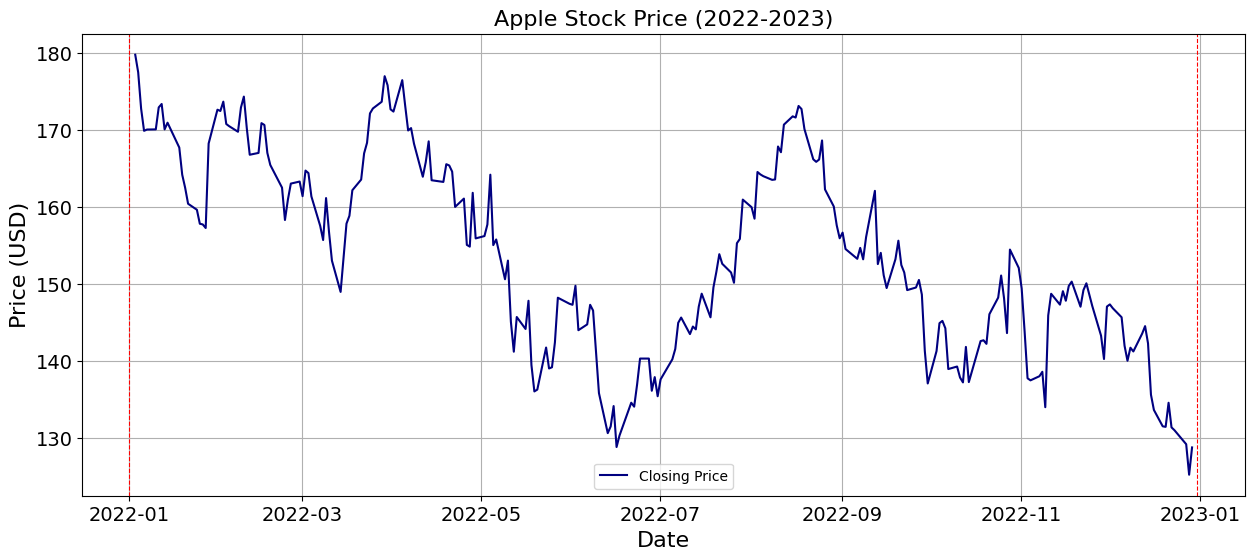

In [13]:

plt.figure(figsize=(15, 6))
plt.plot(stock_data['Date'], stock_data['Close'], color='navy', label='Closing Price')
# Adding labels and title
plt.title('Apple Stock Price (2022-2023)', fontsize=16)  # Increase title font size if needed
plt.xlabel('Date', fontsize=16)  # Adjust font size as needed
plt.ylabel('Price (USD)', fontsize=16)  # Adjust font size as needed
# Adding grid for better readability
plt.grid(True)
# Adding legend
plt.legend()
# Adding vertical lines to mark the beginning and end of 2022 and 2023
plt.axvline(x=datetime(2022, 1, 1), color='red', linestyle='--', linewidth=0.8)
plt.axvline(x=datetime(2022, 12, 31), color='red', linestyle='--', linewidth=0.8)

# Increase font size of tick labels on both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()